**CIFAR10**

**KERAS CNN**

**BY:Maryam Madadgar**

**Introduction:**

**About CIFAR-10 Data:**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Research objective:**
I am going to perform a Classification for CIFAR10 dataset using CNN with Keras.

In [ ]:
## First, we will import the necessary libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns


In [ ]:
## Next, we will load the dataset. In this example, we will use the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes. We will divide the dataset into training and testing sets:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
## Finally, we will compile and train the model:
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=100,validation_split=0.1, validation_data=(x_test, y_test))

Epoch 1/50
500/500 [==============================] - 7s 10ms/step - loss: 1.8443 - accuracy: 0.3128 - val_loss: 1.5435 - val_accuracy: 0.4455
Epoch 2/50
500/500 [==============================] - 5s 11ms/step - loss: 1.4887 - accuracy: 0.4584 - val_loss: 1.3152 - val_accuracy: 0.5421
Epoch 3/50
500/500 [==============================] - 5s 10ms/step - loss: 1.3252 - accuracy: 0.5216 - val_loss: 1.1785 - val_accuracy: 0.5876
Epoch 4/50
500/500 [==============================] - 5s 10ms/step - loss: 1.2158 - accuracy: 0.5675 - val_loss: 1.1293 - val_accuracy: 0.6080
Epoch 5/50
500/500 [==============================] - 5s 10ms/step - loss: 1.1233 - accuracy: 0.6049 - val_loss: 1.0316 - val_accuracy: 0.6412
Epoch 6/50
500/500 [==============================] - 5s 10ms/step - loss: 1.0550 - accuracy: 0.6301 - val_loss: 0.9461 - val_accuracy: 0.6765
Epoch 7/50
500/500 [==============================] - 5s 10ms/step - loss: 0.9960 - accuracy: 0.6523 - val_loss: 0.9206 - val_accuracy: 0.6849

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.844335,0.31280,1.543499,0.4455
1,1.488746,0.45842,1.315160,0.5421
2,1.325174,0.52164,1.178522,0.5876
3,1.215808,0.56748,1.129285,0.6080
4,1.123276,0.60492,1.031584,0.6412


<Axes: >

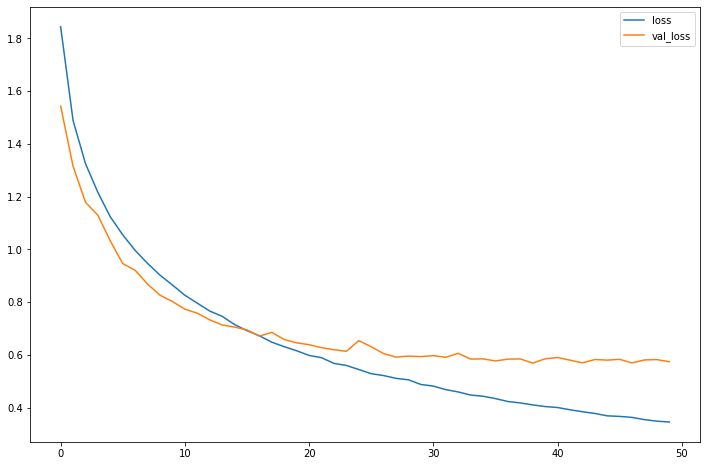

In [ ]:
losses[['loss','val_loss']].plot(figsize=(12,8))


<Axes: >

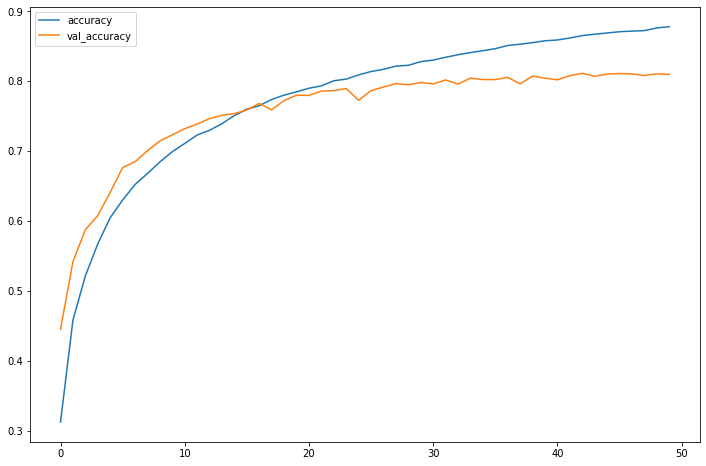

In [ ]:
losses[['accuracy','val_accuracy']].plot(figsize=(12,8))


In [ ]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cr = classification_report(y_test, y_pred)
print(cr)

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.89      0.92      0.90      1000
           2       0.75      0.71      0.73      1000
           3       0.69      0.64      0.66      1000
           4       0.80      0.78      0.79      1000
           5       0.75      0.72      0.73      1000
           6       0.80      0.90      0.85      1000
           7       0.85      0.83      0.84      1000
           8       0.88      0.89      0.88      1000
           9       0.84      0.90      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



<Axes: >

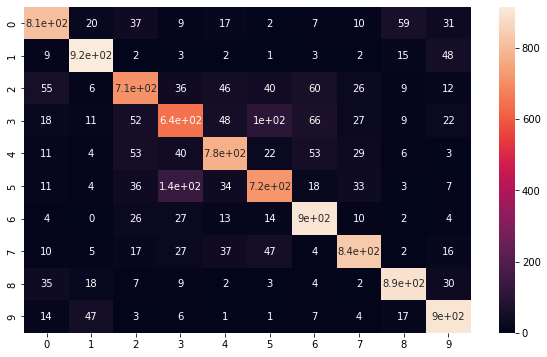

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**Conclusion:**
Finally I could reach to 87% accuracy in train dataset and 81% in test dataset with Adamax optimizer. I was also able to overcome the overfitting somewhat with Dropout technique. 